In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv(r"C:\Users\kulla\Desktop\Projects\Mini Project\Datasets\breast_cancer\breast-cancer.csv")  # Replace with actual dataset path
df = df.dropna()
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Encode all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Display encoded DataFrame
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X = df.drop(columns=['id','diagnosis'])
y = df['diagnosis']
# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<Axes: xlabel='diagnosis', ylabel='count'>

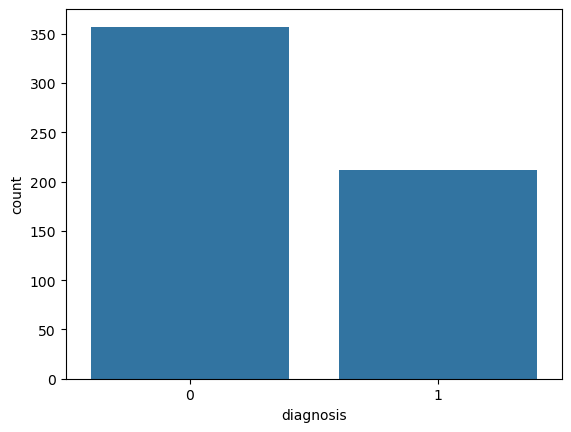

In [19]:
import seaborn as sns
sns.countplot(x=df['diagnosis'])

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143





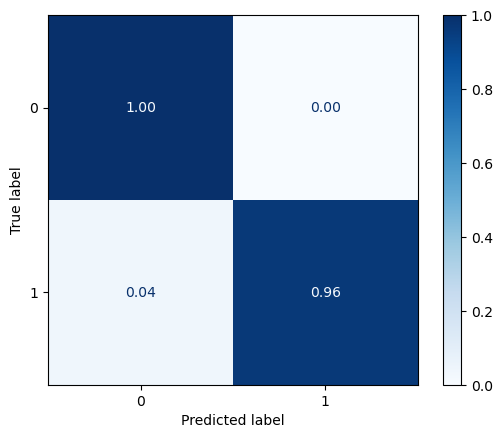

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143





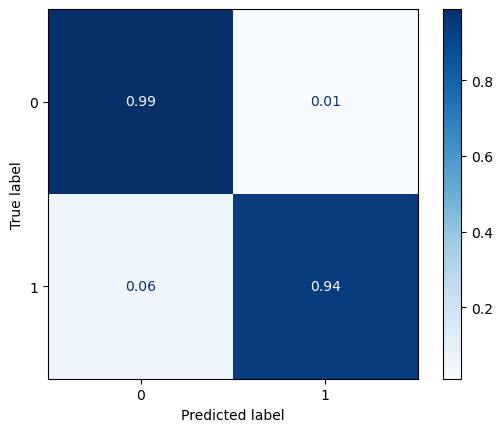

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143





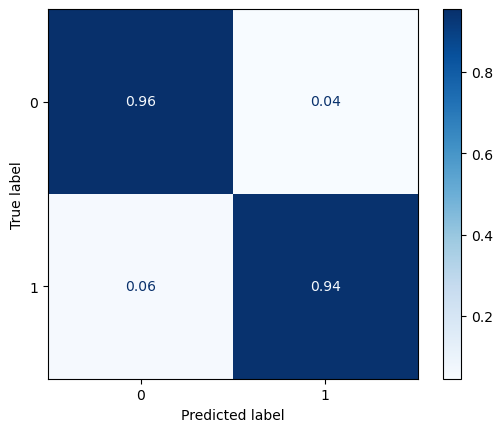

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143





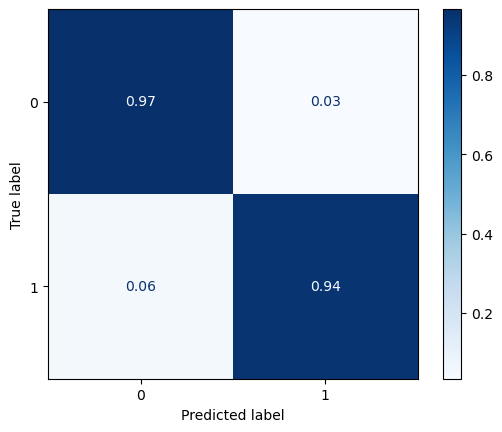

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143





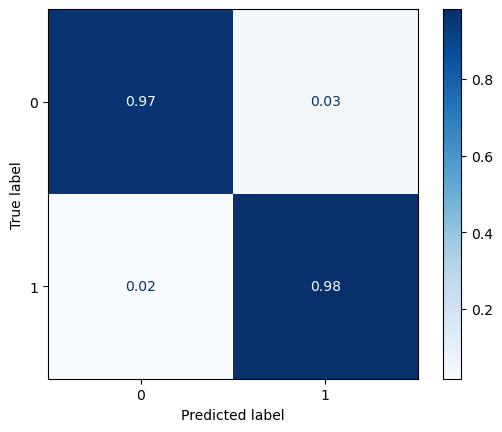

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.986014   1.000000  0.962963  0.981132  0.998127
Random Forest        0.972028   0.980769  0.944444  0.962264  0.995422
Decision Tree        0.951049   0.927273  0.944444  0.935780  0.949750
XGBoost              0.958042   0.944444  0.944444  0.944444  0.992926
MLP Classifier       0.972028   0.946429  0.981481  0.963636  0.998127


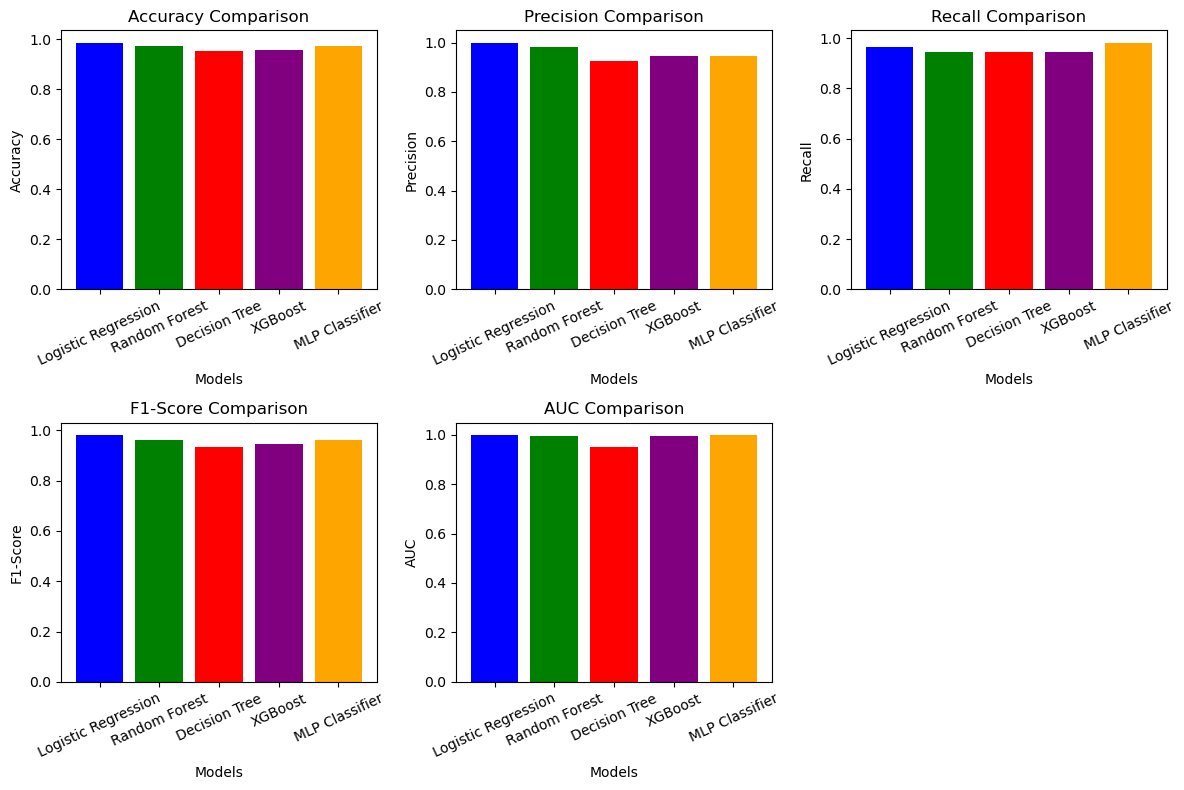

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,ConfusionMatrixDisplay



# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class="ovr"),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # Probability scores

    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics (use weighted for multi-class)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)  # Multi-class AUC

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# Plot histograms for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        86
           1       0.98      0.96      0.97        93

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179





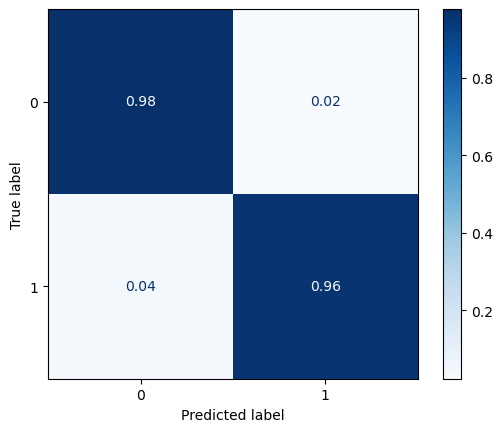

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      0.97      0.97        93

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179





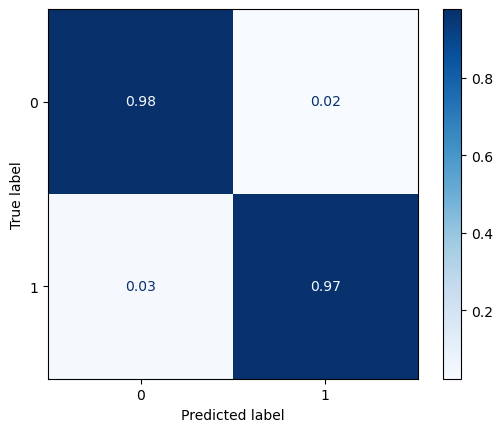

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.95      0.96      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179





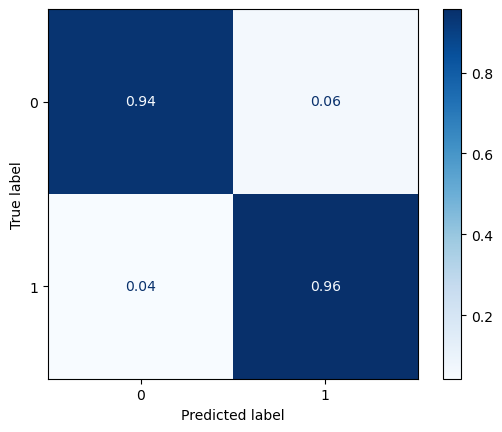

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      0.97      0.97        93

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179





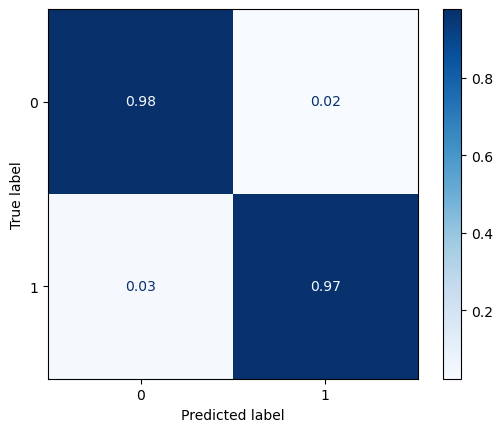

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      0.97      0.97        93

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179





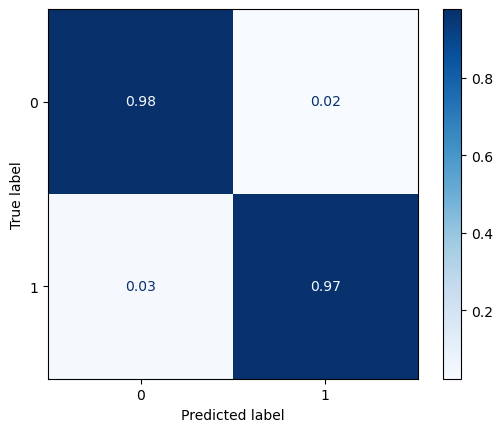

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.966480   0.978022  0.956989  0.967391  0.995374
Random Forest        0.972067   0.978261  0.967742  0.972973  0.993373
Decision Tree        0.949721   0.946809  0.956989  0.951872  0.949425
XGBoost              0.972067   0.978261  0.967742  0.972973  0.997999
MLP Classifier       0.972067   0.978261  0.967742  0.972973  0.991123


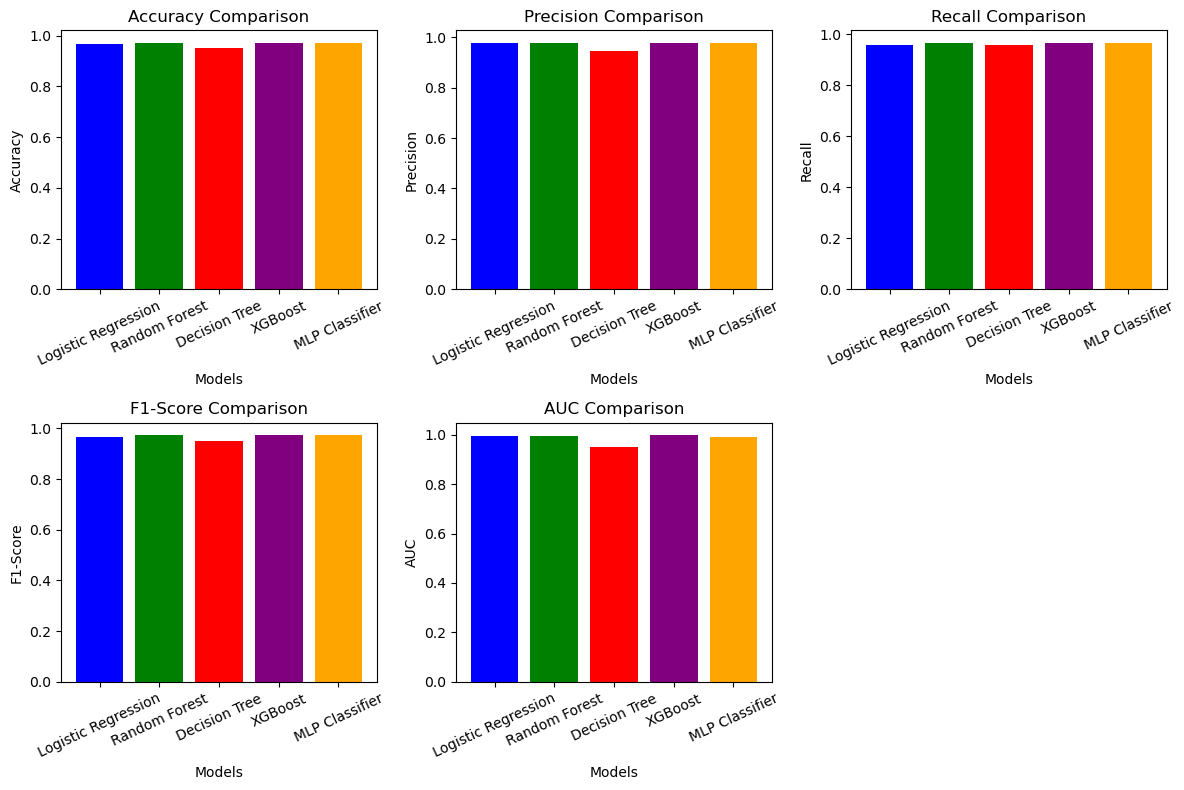

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
X = df.drop(columns=['id','diagnosis'])
y = df['diagnosis']
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class="ovr"),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # Probability scores

    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics (use weighted for multi-class)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)  # Multi-class AUC

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# Plot histograms for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()


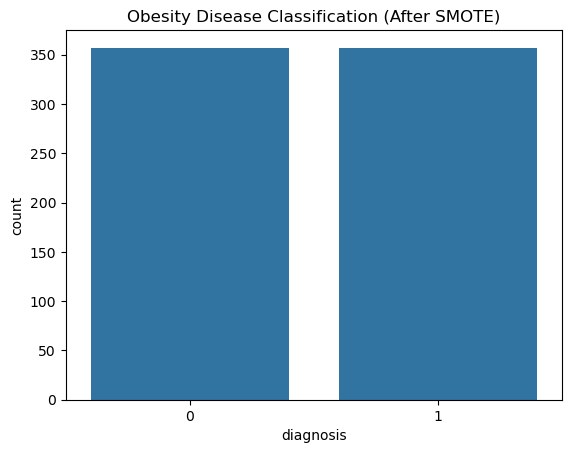

In [25]:
df_resampled = pd.DataFrame(y_resampled, columns=['diagnosis'])
sns.countplot(x=df_resampled['diagnosis'])
plt.title("Obesity Disease Classification (After SMOTE)")
plt.show()

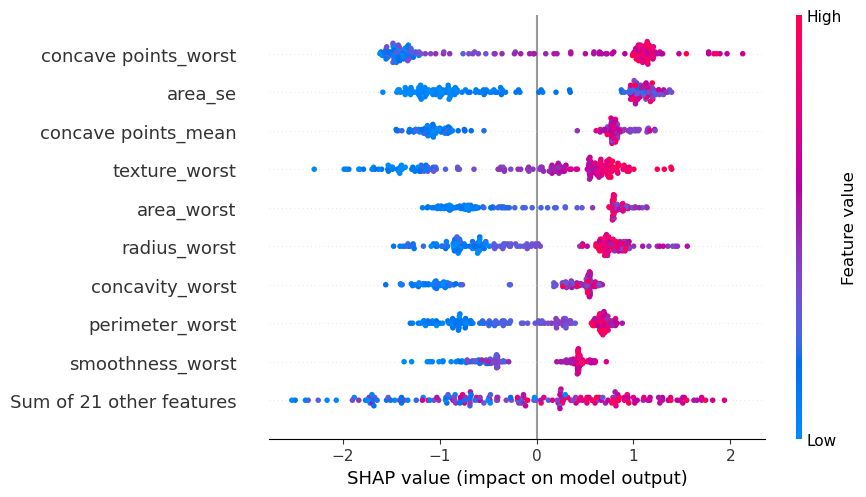

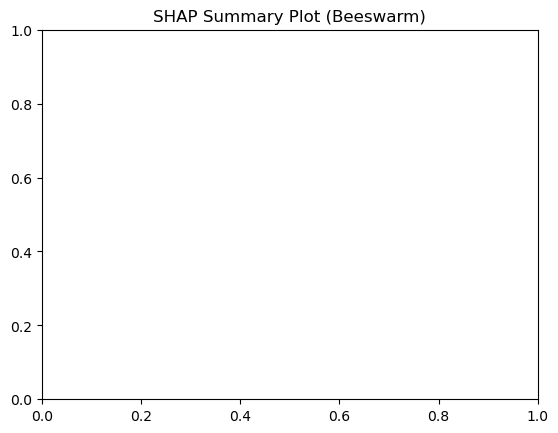

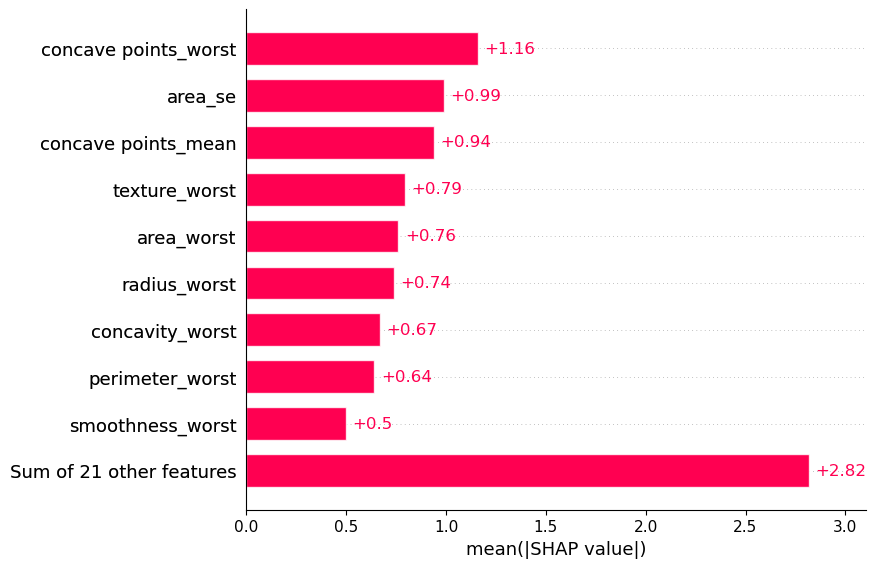

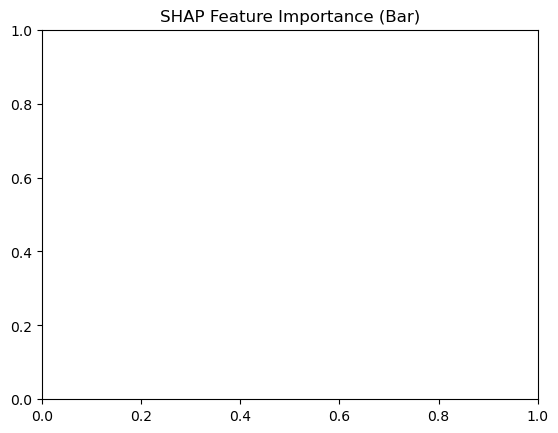

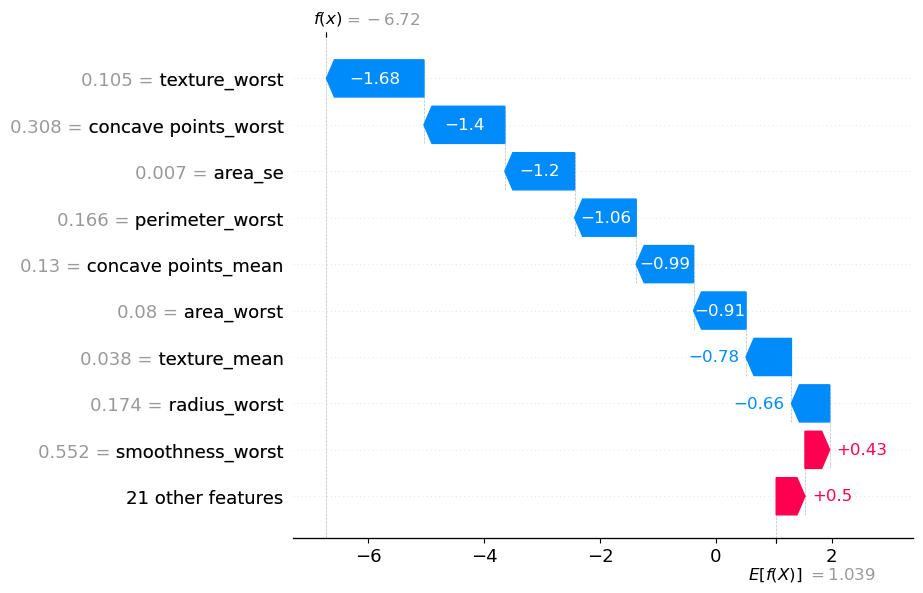

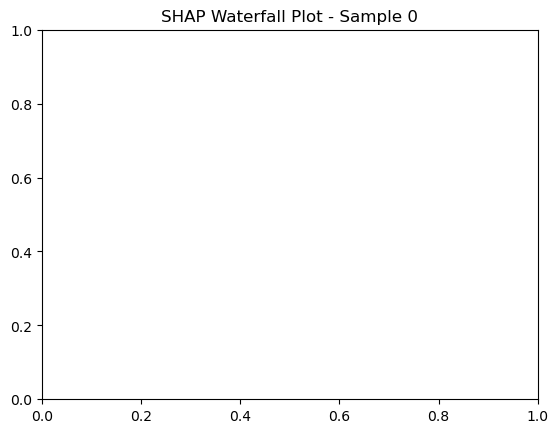

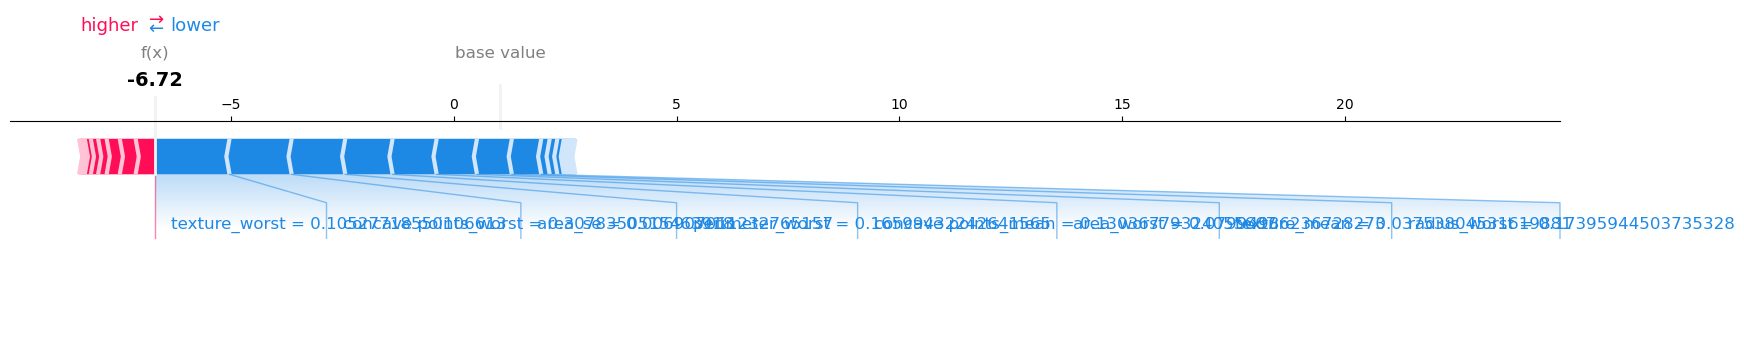

In [27]:
import shap

# Use X_test with original column names
feature_names = X.columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(models["XGBoost"], X_test_df)

# Calculate SHAP values for test set
shap_values = explainer(X_test_df)

shap.plots.beeswarm(shap_values)
plt.title("SHAP Summary Plot (Beeswarm)")
plt.show()

shap.plots.bar(shap_values)
plt.title("SHAP Feature Importance (Bar)")
plt.show()

i = 0  # Index of sample in X_test to explain
shap.plots.waterfall(shap_values[i])
plt.title(f"SHAP Waterfall Plot - Sample {i}")
plt.show()

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i].values, X_test_df.iloc[i], matplotlib=True)


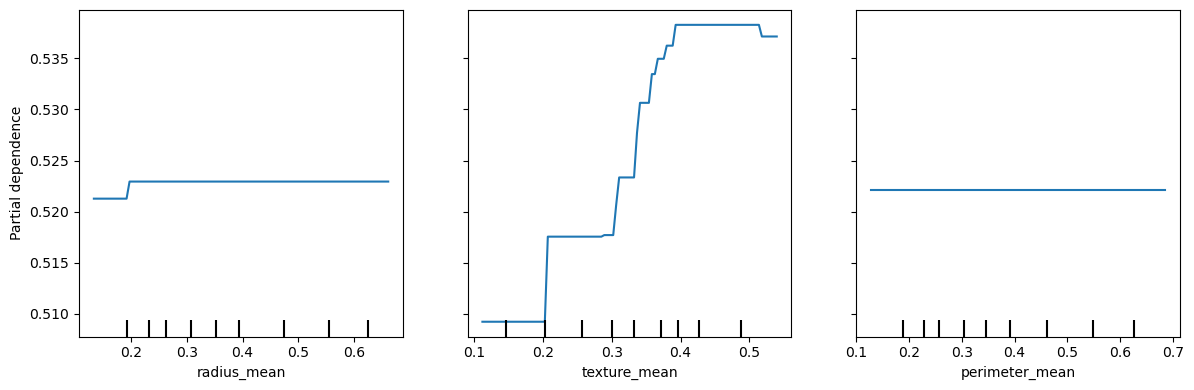

In [28]:
from sklearn.inspection import PartialDependenceDisplay

# Use a DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Choose the model and target class to explain (e.g., class label or index)
model = models["XGBoost"]
target_class = model.classes_[0]  # Change this to class label you want PDP for

# Features to plot PDPs for (choose top features or any you're interested in)
features_to_plot = [0, 1, 2]  # or use feature names like ['Age', 'BMI', 'FCVC']

# Plot PDPs
fig, ax = plt.subplots(figsize=(12, 4))

PartialDependenceDisplay.from_estimator(
    model,
    X_test_df,
    features=features_to_plot,
    target=target_class,  # Required for multi-class classification
    feature_names=X.columns,
    ax=ax
)

plt.tight_layout()
plt.show()
